In [1]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pathlib
rootdir=pathlib.Path().resolve()

In [3]:
# Set the directory where the xvg files are located

# Create an empty list to hold the dataframes
dfs = []
print('The program only works with SASA and Gyrate plots that have the word sasa and gyr inside their names (uppercase or lowercase is not important)')
source = input("Input the full xvg file (eg: rmsd_p100.xvg) or hbonds.dat for hydrogen bond plot from VMD: ")
protein = input('Please write the name of the protein:')
# Loop through all the subfolders and find the xvg files
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(source):
            filepath = os.path.join(subdir, file)
            # Read the xvg file into a pandas dataframe
            name=os.path.basename(subdir)
            if (source.upper().find('RMSF') == -1):
                if (file.upper().find('SASA') != -1):
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=24, names=['time',name])
                elif (file.upper().find('GYR') != -1):
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=27, names=['time',name,'rx','ry','rz'])
                elif (file.upper().find('HBOND') != -1):
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, names=['time',name])
                else:
                    df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=18, names=['time',name])
                
                # Add a column to the dataframe with the name of the subfolder
                if len(dfs)==0:
                    dfs.append(df['time'])
                dfs.append(df[name])
            else:
                df = pd.read_csv(filepath, sep='\s+', dtype=np.float64, skiprows=17, names=['time',name])
                if len(dfs)==0:
                    dfs.append(df['time'])
                dfs.append(df[name])
                

# Concatenate all the dataframes in the list into one
df=pd.DataFrame(dfs)
df=df.T


The program only works with SASA and Gyrate plots that have the word sasa and gyr inside their names (uppercase or lowercase is not important)


In [4]:
# Use seaborn to plot the data
#print(df.head)
#print(df.columns)
df.to_csv(source.replace('dat','xvg').replace('xvg','csv'), index=False)
if (source.upper().find('RMSF') == -1):
    df.time=df.time/100

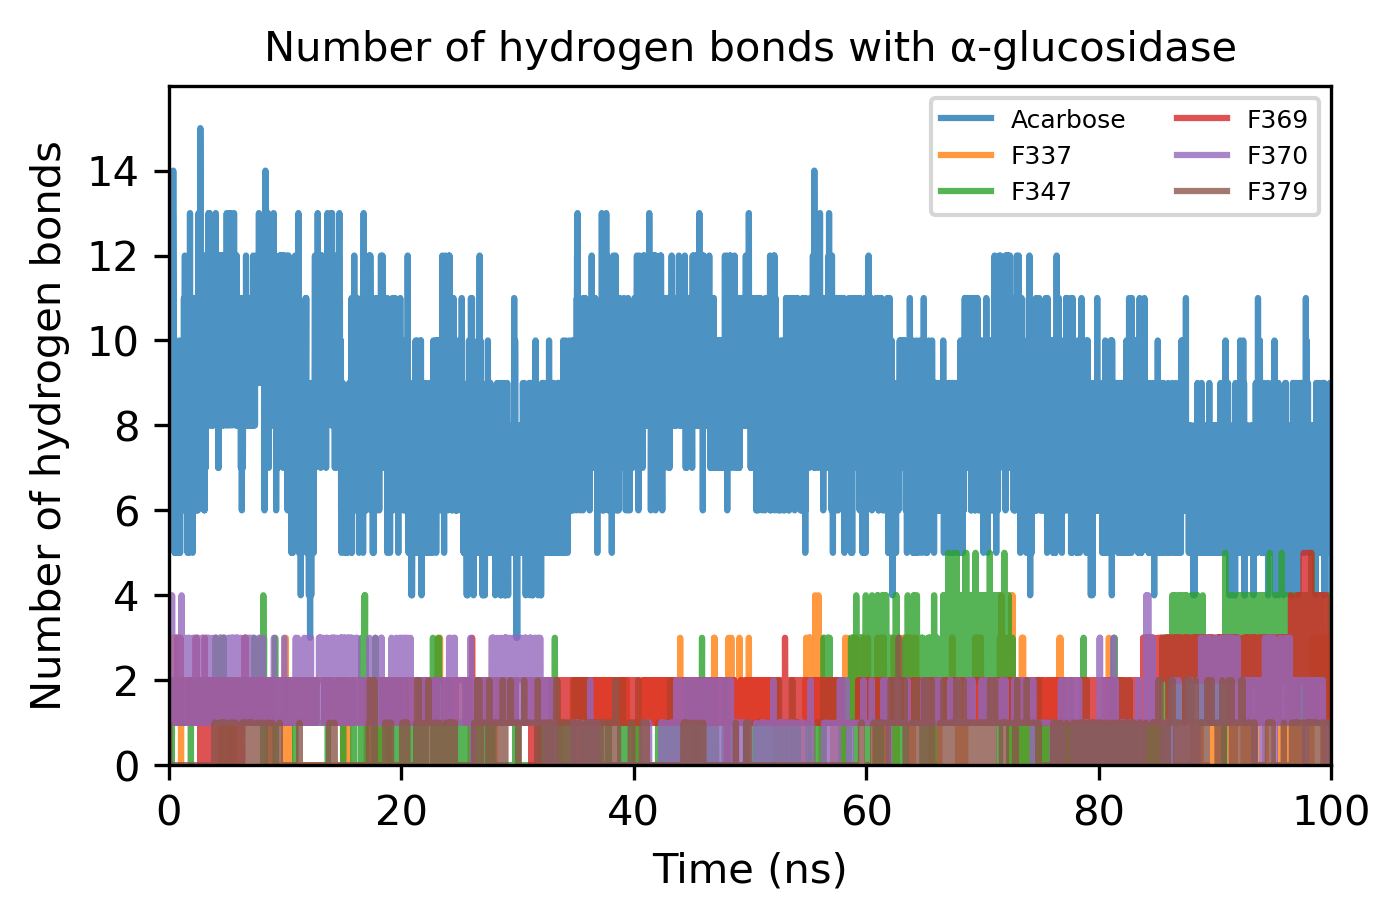

In [8]:
plt.rcParams["figure.dpi"] = 300
ax=df.plot(x='time',figsize=(5,3),alpha=0.8)
ymin, ymax = ax.get_ylim()
if (source.upper().find('RMSF') == -1):
    plt.xlabel('Time (ns)', fontsize=10)
    if (source.upper().find('SASA') != -1):
        plt.ylabel('SASA (nm$^2$)', fontsize=10)
        plt.title('Solvent accessible surface area of '+protein,fontsize=10)
    elif (source.upper().find('GYR') != -1):
        plt.ylabel('Gyrate (nm)', fontsize=14)
        plt.title('Radius of gyration of '+protein,fontsize=10)
    elif (source.upper().find('HBOND') != -1):
        plt.title('Number of hydrogen bonds with '+protein,fontsize=10)
        plt.ylabel('Number of hydrogen bonds', fontsize=10)
        plt.ylim(0,int(ymax)+1)
        plt.yticks(np.arange(0, int(ymax)+1, 2))
    else:
        plt.ylabel('RMSD (nm)', fontsize=10)    
        plt.title('RMSD of '+protein+' in complex with ligands' ,fontsize=10)
else:
    plt.xlabel('Residue index', fontsize=10)
    plt.title('Cα RMS fluctuation of ' + protein ,fontsize=10)
    plt.ylabel('RMSF (nm)', fontsize=10)


params = {'axes.labelsize': 18,'axes.titlesize':20,\
          'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 28, 'ytick.labelsize': 40}
plt.xlim(0,df.time.iloc[-1])
plt.legend(ncol=2, loc="upper right", prop={'size': 6})
figure=source.replace('dat','xvg').replace('xvg','png')
plt.savefig(figure,bbox_inches='tight')

plt.show()